In [ ]:
!pip install -q -U 'tensorflow-text==2.8.*'
!pip install -q tf-models-official==2.7.0
!pip install tensorflow_addons
!pip install -U --no-cache-di gdown --pre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
 

In [ ]:
# !gdown --no-cookies --id 1f_BAk6dzyXW5MX4E8S0OMWV1k1mqef1X
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/My Drive/Dataset/demake_up_data.zip' '/content'
!unzip /content/demake_up_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: demake_up_data/train/high_r/3622.png  
  inflating: demake_up_data/train/high_r/273.png  
  inflating: demake_up_data/train/high_r/4442.png  
  inflating: demake_up_data/train/high_r/294.png  
  inflating: demake_up_data/train/high_r/173.png  
  inflating: demake_up_data/train/high_r/3872.png  
  inflating: demake_up_data/train/high_r/4123.png  
  inflating: demake_up_data/train/high_r/3619.png  
  inflating: demake_up_data/train/high_r/5.png  
  inflating: demake_up_data/train/high_r/3614.png  
  inflating: demake_up_data/train/high_r/1726.png  
  inflating: demake_up_data/train/high_r/2737.png  
  inflating: demake_up_data/train/high_r/2063.png  
  inflating: demake_up_data/train/high_r/2889.png  
  inflating: demake_up_data/train/high_r/4244.png  
  inflating: demake_up_data/train/high_r/1693.png  
  inflating: demake_up_data/train/high_r/4292.png  
  inflating: demake_up_data/train/high_r/1749.png  
  inflating: demake

# Importing necessary modules/libraries

In [1]:
# import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras as keras

from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Data processing

In [ ]:
# CONFIG PARAMETERS
BATCH_SIZE = 16
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
BUFFER_SIZE = BATCH_SIZE * 10
IMG_PATH = '/content/demake_up_data'
EPOCHS = 20

np.random.seed(69)

## Load data

In [ ]:
def load(img_file):
  makeup_img_file, non_img_file = tf.split(img_file, 2)

  makeup_img = tf.io.read_file(makeup_img_file[0])
  makeup_img = tf.image.decode_jpeg(makeup_img, channels=IMG_CHANNELS)

  non_img = tf.io.read_file(non_img_file[0])
  non_img = tf.image.decode_jpeg(non_img, channels=IMG_CHANNELS)

  makeup_img = tf.cast(makeup_img, tf.float32)
  non_img = tf.cast(non_img, tf.float32)

  return makeup_img, non_img

(224, 224, 3)
(224, 224, 3)


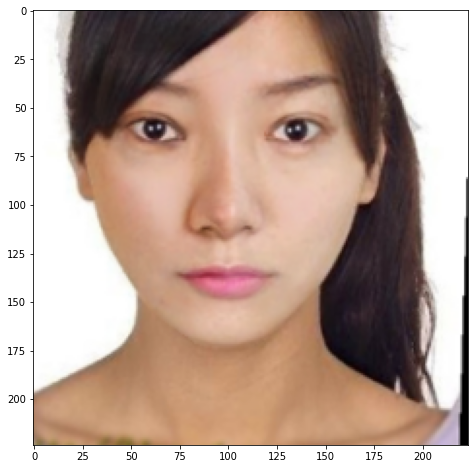

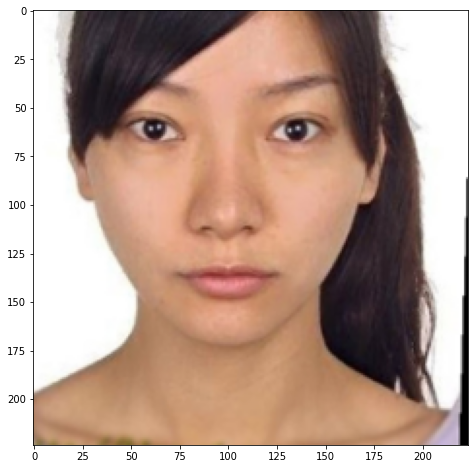

In [ ]:
makeup_img, non_img = load([str(IMG_PATH+'/train/makeup/0.png'), 
                            str(IMG_PATH+'/train/non-makeup/0.png')])
print(makeup_img.shape)
print(non_img.shape)

plt.figure(figsize=(10, 8))
plt.imshow(makeup_img/255.0)

plt.figure(figsize=(10, 8))
plt.imshow(non_img/255.0)

In [ ]:
@tf.function
def random_flip(makeup_img, non_img):
  if tf.random.uniform(()) > 0.5:
    # Random_mirroring
    makeup_img = tf.image.flip_left_right(makeup_img)
    non_img = tf.image.flip_left_right(non_img)
  return makeup_img, non_img

def processing_image(makeup_img, non_img):
  makeup_img = (makeup_img/255.0)
  non_img = (non_img/255.0)
  return makeup_img, non_img

def load_image_train(image_file):
  makeup_img, non_img = load(image_file)
  makeup_img, non_img = random_flip(makeup_img, non_img)
  makeup_img, non_img = processing_image(makeup_img, non_img)
  return makeup_img, non_img

def load_image_val(image_file):
  makeup_img, non_img = load(image_file)
  makeup_img, non_img = processing_image(makeup_img, non_img)
  return makeup_img, non_img

In [ ]:
def prepare_data(path):
  makeup_img_list = [os.path.join(path, f) for f in os.listdir(path)]
  data_list = [[i, i.replace('makeup', 'non-makeup')] for i in makeup_img_list]
  return data_list

train_data_list = prepare_data(str(IMG_PATH + '/train/makeup/'))
val_data_list = prepare_data(str(IMG_PATH + '/val/makeup/'))
test_data_list = prepare_data(str(IMG_PATH + '/test/makeup'))

np.random.shuffle(train_data_list)
np.random.shuffle(val_data_list)
np.random.shuffle(test_data_list)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_data_list)
train_dataset = train_dataset.map(load_image_train, 
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_datatset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices(val_data_list)
val_dataset = val_dataset.map(load_image_val)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_data_list)
test_dataset = test_dataset.map(load_image_val)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Model Implementation

In [3]:
class ResNet34():
  def __init__(self):
    pass

  def identity_block(self, inputs, filters):
    x = layers.Conv2D(filters, kernel_size=(3, 3), padding='same', use_bias=False)(inputs)
    x = tfa.layers.InstanceNormalization()(x)
    x = layers.Activation('gelu')(x)
    x = layers.Conv2D(filters, kernel_size=(3, 3), padding='same', use_bias=False)(x)
    x = tfa.layers.InstanceNormalization()(x)
    
    skip_connection = keras.layers.Add()([inputs, x])
    x = keras.layers.Activation('gelu')(skip_connection)
    return x

  def projection_block(self, inputs, filters, strides=2):
    x = layers.Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=strides, use_bias=False)(inputs)
    x = tfa.layers.InstanceNormalization()(x)
    x = layers.Activation('gelu')(x)
    x = layers.Conv2D(filters=filters, kernel_size=(3, 3), padding='same', use_bias=False)(x)
    x = tfa.layers.InstanceNormalization()(x)

    shortcut = layers.Conv2D(filters=filters, kernel_size=(1, 1), padding='same', strides=strides, use_bias=False)(inputs)
    shortcut = tfa.layers.InstanceNormalization()(shortcut)
    
    skip_connection = layers.Add()([shortcut, x])
    x = layers.Activation('gelu')(x)
    return x

  def build_model(self, n_classes, inputs):
    # inputs = layers.Input(shape=input_shape)

    # Conv1
    x = layers.ZeroPadding2D(padding=3)(inputs)
    x = layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2)(x)
    x = tfa.layers.InstanceNormalization()(x)
    x = layers.Activation('gelu')(x)
    x = layers.ZeroPadding2D(padding=1)(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)

    # Conv2
    x = self.identity_block(x, filters=64)
    x = self.identity_block(x, filters=64)
    x = self.identity_block(x, filters=64)

    # Conv3
    x = self.projection_block(x, filters=128)
    x = self.identity_block(x, filters=128)
    x = self.identity_block(x, filters=128)
    x = self.identity_block(x, filters=128)

    # Conv4
    x = self.projection_block(x, filters=256)
    x = self.identity_block(x, filters=256)
    x = self.identity_block(x, filters=256)
    x = self.identity_block(x, filters=256)
    x = self.identity_block(x, filters=256)
    x = self.identity_block(x, filters=256)

    # Conv5
    x = self.projection_block(x, filters=512)
    x = self.identity_block(x, filters=512)
    x = self.identity_block(x, filters=512)

    # output = Model(inputs=inputs, outputs=x, name='ResNet34')
    return x

In [5]:
class ResNet34UNet():
  def __init__(self):
    self.bridge_block_id = 124

  def conv_block(self, inputs, num_filters):
      x = layers.Conv2D(filters=num_filters, kernel_size=(3,3), padding="same")(inputs)
      x = tfa.layers.InstanceNormalization()(x)
      x = layers.Activation('gelu')(x)
      return x

  # Encoder
  def downsampling(self):
    resnet = ResNet34()
    return resnet

  # Decoder
  def upsampling(self, x, filters):
      x = layers.Conv2DTranspose(filters, 3, 2, padding='same')(x)
      # x = layers.Dropout(0.3)(x)
      x = self.conv_block(x, filters)
      return x

  def build_model(self, input_shape=(224, 224, 3)):
    inputs = layers.Input(shape=input_shape)

    # Downsampling
    resnet34 = self.downsampling()
    backbone = resnet34.build_model(n_classes=1000, inputs=inputs)

    # Bottleneck, Bridge: Last block of ResNet34 plays a role of the bridge

    # Upsampling
    db3 = self.upsampling(backbone, 512)
    db2 = self.upsampling(db3, 256)
    db1 = self.upsampling(db2, 128)
    db0 = self.upsampling(db1, 64)
    
    # Output
    final_features = self.upsampling(db0, 64)
    outputs = layers.Conv2D(3, 1, padding='same', activation='sigmoid')(final_features)
    unet_model = Model(inputs=inputs, outputs=outputs, name='Res34-UNet')
    return unet_model

In [6]:
resnet34unet = ResNet34UNet()
resnet34unet_model = resnet34unet.build_model(input_shape=(224, 224, 3))
resnet34unet_model.summary()

Model: "Res34-UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                         

# Config and Compile model

## Show generated images and evaluation model

In [ ]:
def evaluate(model, epoch, dataset):
  psnr_non_mean = 0.0
  count = 0

  for makeup_img, non_img in dataset:
    pred_non = model([makeup_img], training=False)
    psnr_non = tf.image.psnr(pred_non, non_img, max_val=1.0)
    __psnr_non_mean = tf.math.reduce_mean(psnr_non)
    psnr_non_mean += __psnr_non_mean
    count += 1

  psnr_non_mean = psnr_non_mean/count
  print('---------->psnr_non: {}\n---------->epoch: {}\n---------->count:{}'
        .format(psnr_non_mean.numpy(), epoch, count))
  return psnr_non_mean

def generate_images(model, makeup_img, non_img):
  pred_non = model([makeup_img], training=False)
  plt.figure(figsize=(15, 20))

  display_list = [makeup_img[0], non_img[0], pred_non[0]]

  title = ['Input', 'Non-makeup', 'Predicted']
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

## Optimizer

In [ ]:
from official.nlp import optimization 

steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * EPOCHS
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 1e-2
generator_optimizer = optimization.create_optimizer(
                      init_lr=init_lr,
                      num_train_steps=num_train_steps, 
                      num_warmup_steps=num_warmup_steps, 
                      optimizer_type='adamw'
)

# Training

In [ ]:
from tqdm import tqdm

@tf.function
def train_step(model, makeup_img, non_img):
  with tf.GradientTape() as tape:
    pred_non = model([makeup_img], training=True)
    loss = tf.reduce_mean(tf.square(pred_non-non_img))*100
  generator_gradients = tape.gradient(loss, model.trainable_variables)
  generator_optimizer.apply_gradients(zip(generator_gradients, model.trainable_variables))

  return loss

def fit(model, train_ds, epochs, val_ds):
  best_psnr = 0.0
  step_counter = 0
  
  for epoch in range(epochs):
    total_loss = 0.0
    for makeup_img, non_img in tqdm(train_ds):
      loss = train_step(model, makeup_img, non_img)
      total_loss = total_loss + loss
      step_counter += 1
    total_loss = total_loss/step_counter
    print('Epoch: {}\tLoss: {}'.format(epoch, total_loss))

    psnr = evaluate(model, epoch, val_ds)
    if best_psnr < psnr:
      best_psnr = psnr
      for makeup_img, non_img in val_ds.take(1):
        generate_images(model, makeup_img, non_img)

In [ ]:
tf.config.run_functions_eagerly(True)
fit(resnet34unet_model, train_dataset, EPOCHS, val_dataset)

  7%|▋         | 46/625 [00:23<04:38,  2.08it/s]